# Presentación Intermedia
## Student's Performance

## Variables de Interés
Mis variables de interés son 'Gender', 'Race/Ethnicity', 'Parental level of education', 'Lunch', 'Test preparation course', 'Math score', 'Reading score' y 'Writing score'

*Gender es una variable categórica, explica si la persona es hombre o mujer.

*Race/Ethnicity es una variable categórica, explica a cuál raza/etnicidad pertenece la persona.

*Parental level of education es una variable categórica, explica el nivel de educación de los padres de la persona.

*Test preparation course es una variable categórica, explica si la persona se preparó o no para el examen.

*Math score es una variable numérica (int), explica el resultado de la persona en la sección de matemáticas.

*Reading score es una variable numérica (int), explica el resultado de la persona en la sección de lectura.

*Writing score es una variable numérica (int), explica el resultado de la persona en la sección de escritura.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
%ls

 00_00_binder.ipynb                     Clase2.ipynb
 00_00_primer_pasos.ipynb               Clase3.ipynb
 01_01_data_types.ipynb                 Clase4.ipynb
 01_02_read_iloc_unique_groupby.ipynb   Clase5.ipynb
 02_00_data_wrangling.ipynb             datasets/
 02_01_null_display.ipynb              'Presentación Intermedia.ipynb'
 02_02_basic_math.ipynb                 README.md
 A3.ipynb                               requirements.txt
 A5.ipynb                               StudentsPerformance.csv
 Clase1.ipynb


In [5]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.drop('lunch', axis =1)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


## Pregunta 1: ¿Cuál sección del examen tiene un mejor resultado por género?

In [8]:
pivot=pd.pivot_table(df,
                        index='gender',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203
All,66.089000,69.169000,68.054000


In [9]:
pivot=pivot.drop(['All'],
                             axis= 0)

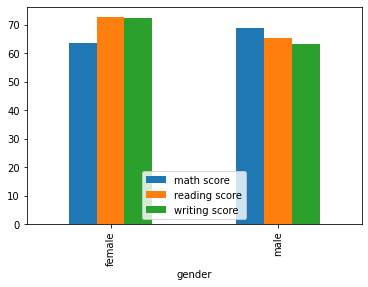

In [10]:
pivot.plot(kind = 'bar')

## Conclusión Pregunta 1:

Las mujeres tienen un mejor resultado en las secciones de lectura y escritura mientras que los hombres tienen un mejor resultado en la sección de matemáticas.

## Pregunta 2: ¿Influye la educación de los padres en el resultado del hijo?

In [11]:
pivot=pd.pivot_table(df,
                        index='parental level of education',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
All,66.089000,69.169000,68.054000


In [12]:
pivot=pivot.drop(['All'],
                             axis= 0)

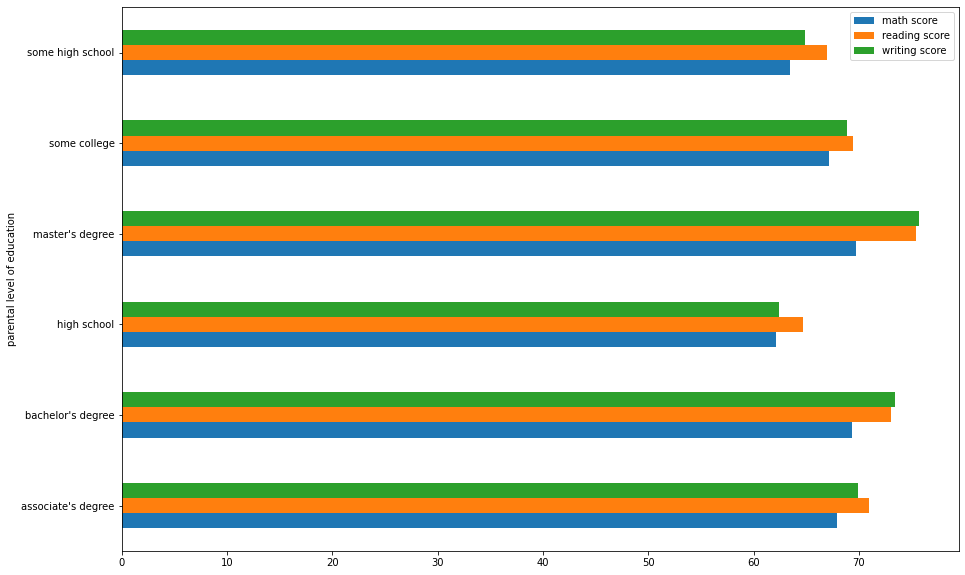

In [13]:
pivot.plot(kind = 'barh', figsize = (15,10))

## Conclusión Pregunta 2:

Existe una ligera correlación entre el nivel de estudio de los padres y los resultados de los hijos, se puede notar que los hijos de padres con master's degree tuvieron un mejor resultado mientras que los hijos de padres con puro high school tuvieron ligeramente un peor resultado.

## Pregunta 3: ¿Influye la preparación del estudiante en su resultado?¶

In [14]:
pivot=pd.pivot_table(df,
                        index='test preparation course',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673
All,66.089000,69.169000,68.054000


In [15]:
pivot=pivot.drop(['All'],
                             axis= 0)

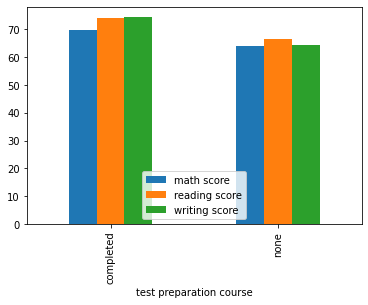

In [16]:
pivot.plot(kind = 'bar')

## Conclusión Pregunta 3:

Se observa que los estudiantes que completaron el curso de preparación para el examen tuvieron un mejor resultado que aquellos que no tomaron el curso.

## Pregunta 4: ¿Influye la la raza/etnicidad de la persona en su resultado?

In [17]:
pivot=pd.pivot_table(df,
                        index='race/ethnicity',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143
All,66.089000,69.169000,68.054000


In [18]:
pivot=pivot.drop(['All'],
                             axis= 0)

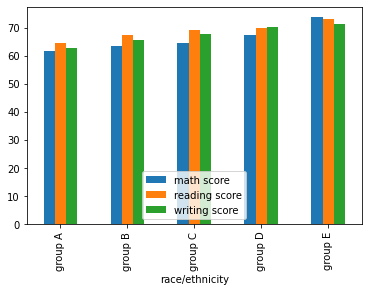

In [19]:
pivot.plot(kind = 'bar')

## Conclusión Pregunta 4:

Se observa que la gente que pertenece a la raza/etnicidad del grupo E obtuvo un mejor resultado en el examen, mientras que la gente que pertenece al grupo A tuvo un peor resultado.